In [45]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Importing all the datasets
#Training Set of users
train_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/train_users_2.csv')
#Testing Set of users
test_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/test_users.csv')
#web sessions log for users
sessions=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sessions.csv')
#Loading the summary stats of countries
countries=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/countries.csv')
#Summary stats of user age
age_gender_bkts=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/age_gender_bkts.csv')
#Sample submission
sample_submission=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sample_submission_NDF.csv')

In [47]:
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['timestamp_first_active'] = pd.to_datetime(train_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [48]:
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['timestamp_first_active'] = pd.to_datetime(test_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [49]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [50]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [51]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [52]:
sample_submission.head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [53]:
#Segregating predictors and independent variable
y=train_users[['country_destination']]
X=train_users.drop(['country_destination'],axis=1)

In [54]:
y.head()

,country_destination
0,NDF
1,NDF
2,US
3,other
4,US


In [55]:
X.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


# EDA

In [56]:
#Function to get distribution graphs

def get_distr(feature):
    sns.set()
    plt.figure(figsize=(10,8))
    sns.barplot(train_users[feature].value_counts().index,train_users[feature].value_counts(),palette="husl")
    

**Gender**

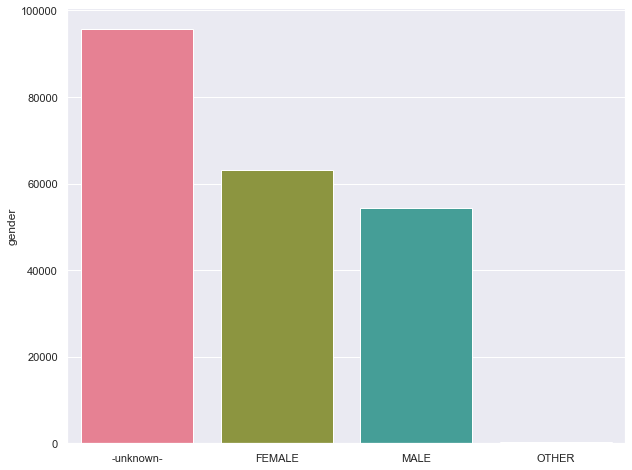

In [57]:
get_distr('gender')

**Desination Distribution**

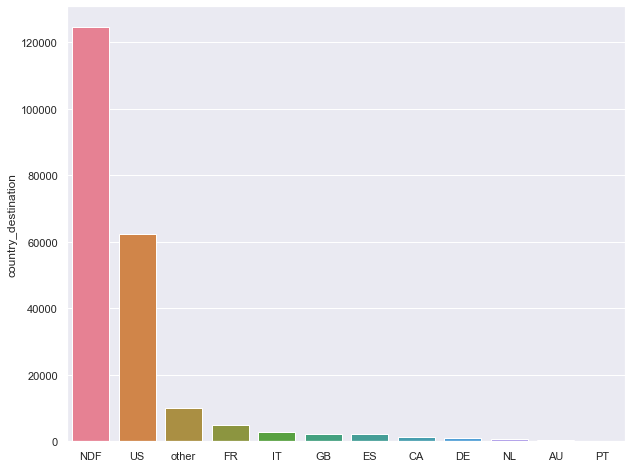

In [58]:
get_distr('country_destination')

**Signup Method**

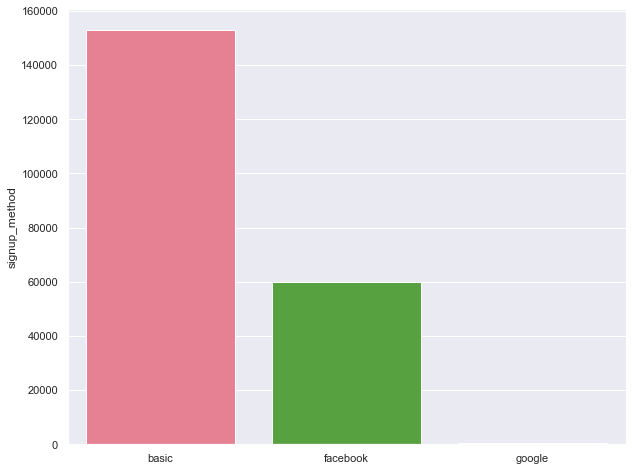

In [59]:
get_distr('signup_method')

**age distribution**

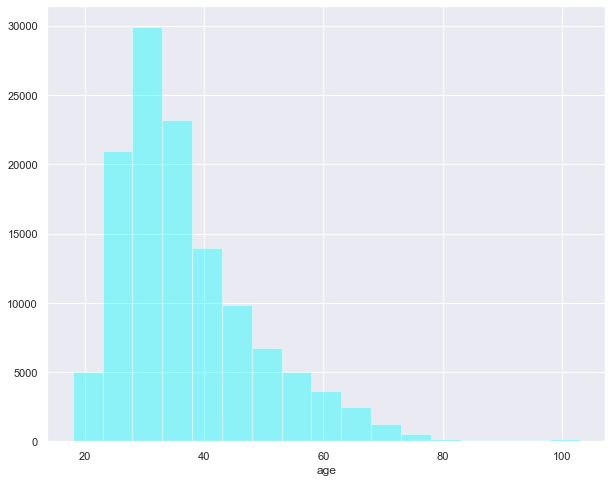

In [60]:
#get_distr('age')
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(train_users['age'],color="cyan",bins=np.arange(18,100+5,5),kde=False)

In [61]:
X['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

- Age of 2014 isn't possible and 1 is also not possible so capping the age and converting them to Nan'S


In [62]:
X.loc[X.age > 95, 'age'] = np.nan
X.loc[X.age < 18, 'age'] = np.nan

**language distribution**

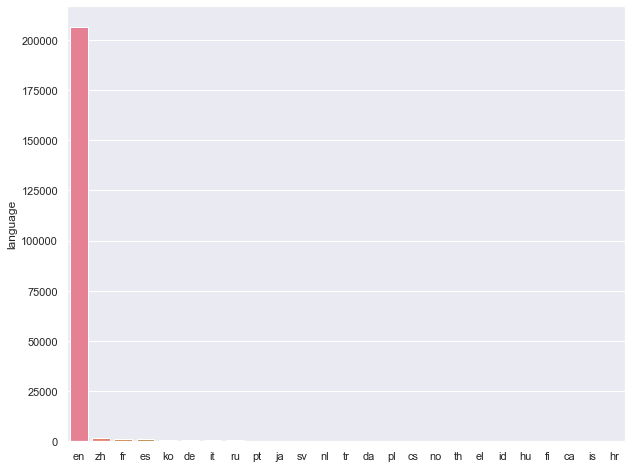

In [63]:
get_distr('language')

**Signup app**

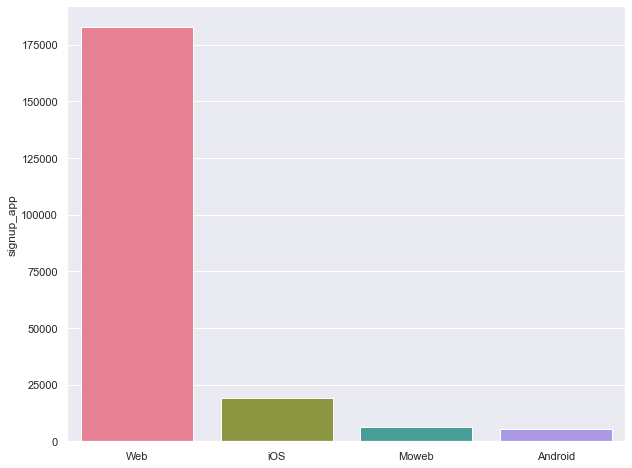

In [64]:
get_distr('signup_app')

**first device type**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

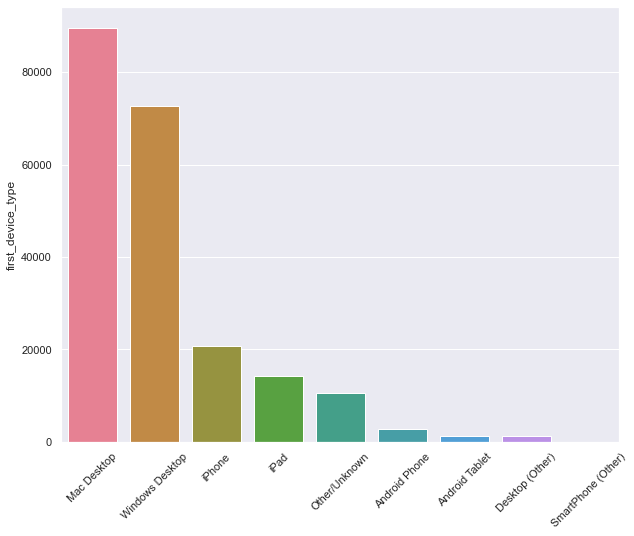

In [65]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['first_device_type'].value_counts().index,train_users['first_device_type'].value_counts(),palette="husl")
plt.xticks(rotation=45)

**When did the customers joined AirBnB?**

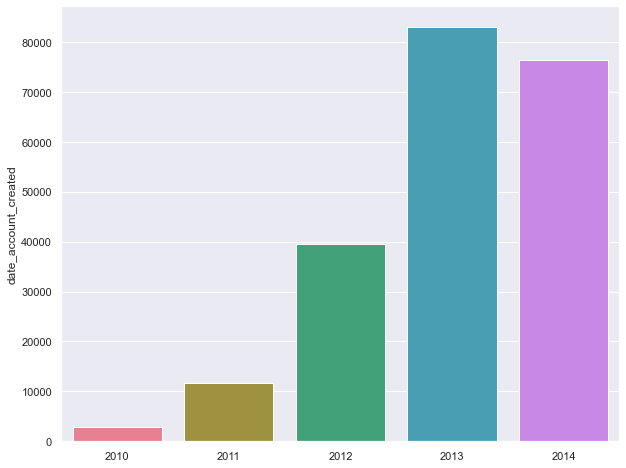

In [66]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_account_created'].dt.year.value_counts().index,train_users['date_account_created'].dt.year.value_counts(),palette="husl")

**When did customers do there first booking?**

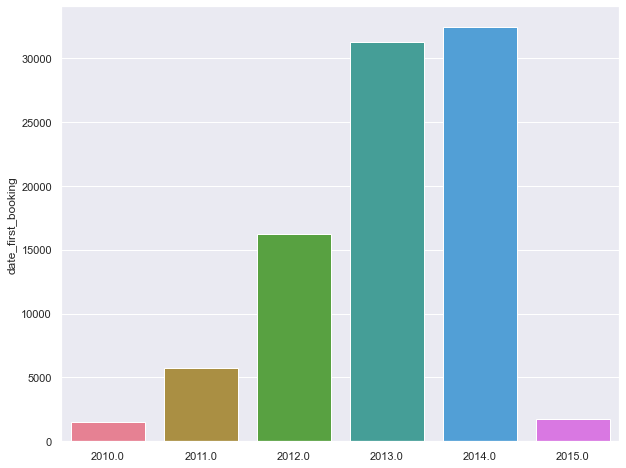

In [67]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_first_booking'].dt.year.value_counts().index,train_users['date_first_booking'].dt.year.value_counts(),palette="husl")

### Inference from the data given above

- In terms of gender, females are more active on AirBnB then main. And majority of the users havent specfied their gender
- A major chunk of people just join the website but don't book a destination(NDF). US is the most popular destination followed by other locations, france and italy.
- Majority of our users join via basic then via facebook
- In terms of users, we see high values in the range 20-40 peaking at ~30
- In terms of language major users english, followed by chinese and french
- Majority of the users signed up by Web followed by iOS
- An interesting trend is that major users signed up in 2013 whereas major bookings are done in 2014

# Feature Engineering

In [68]:
#Finding Null Entries
pd.set_option('display.max_rows', None)
print("The null values in the dataset are:")
pd.DataFrame(np.sum(X.isnull(),axis=0))

The null values in the dataset are:


,0
id,0
date_account_created,0
timestamp_first_active,0
date_first_booking,124543
gender,0
age,90586
signup_method,0
signup_flow,0
language,0
affiliate_channel,0


In [69]:
def extract_elements_date(feature):
    y=feature+'_year'
    X[y]=X[feature].dt.year
    m=feature+'_month'
    X[m]=X[feature].dt.month
    d=feature+'_date'
    X[d]=X[feature].dt.day
    

In [70]:
#Extracting columns
extract_elements_date('date_account_created')
extract_elements_date('date_first_booking')
extract_elements_date('timestamp_first_active')
X['timestamp_first_active_hour']=X['timestamp_first_active'].dt.hour

#Dropping columns
X=X.drop(['id'],axis=1)
X=X.drop(['date_account_created'],axis=1)
X=X.drop(['date_first_booking'],axis=1)
X=X.drop(['timestamp_first_active'],axis=1)

In [71]:
X.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,date_account_created_year,date_account_created_month,date_account_created_date,date_first_booking_year,date_first_booking_month,date_first_booking_date,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_date,timestamp_first_active_hour
0,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,2010,6,28,NaN,NaN,NaN,2009,3,19,4
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,2011,5,25,NaN,NaN,NaN,2009,5,23,17
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,2010,9,28,2010.0,8.0,2.0,2009,6,9,23
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,2011,12,5,2012.0,9.0,8.0,2009,10,31,6
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,2010,9,14,2010.0,2.0,18.0,2009,12,8,6


In [72]:
#Making singup flow catgorical
X['signup_flow']=X['signup_flow'].astype('str')

#one hot encoding
def create_dummyvariables(data,columname):
    col=pd.get_dummies(data[columname], prefix=columname).iloc[:, 1:] #Taking all columns after the 0th column for k-1 dummy variables
    data=pd.concat([data, col], axis=1)
    data=data.drop([columname],axis=1)
    return data

categorical_features=['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app',
                    'first_device_type','first_browser']

for i in categorical_features:
    X=create_dummyvariables(X,i)

In [73]:
#The number of rows and columns for X
print("The shape of X is {}".format(X.shape))

The shape of X is (213451, 148)


In [74]:
#Finding Null Entries
print("The null values in the dataset are:")
df=pd.DataFrame(np.sum(X.isnull(),axis=0))
df[[0]]=(df[[0]]/X.shape[0])*100
df

The null values in the dataset are:


,0
age,42.438780
date_account_created_year,0.000000
date_account_created_month,0.000000
date_account_created_date,0.000000
date_first_booking_year,58.347349
date_first_booking_month,58.347349
date_first_booking_date,58.347349
timestamp_first_active_year,0.000000
timestamp_first_active_month,0.000000
timestamp_first_active_date,0.000000


- It can be seen from the above analysis that ~58% of the entries for date first booked are empty, hence, for the time being we will be dropping these values.
- Imputing mean age for NaN

In [75]:
#imputing mean age
X['age'].fillna(X['age'].mean(),inplace=True)

In [76]:
X=X.drop(['date_first_booking_year'],axis=1)
X=X.drop(['date_first_booking_month'],axis=1)
X=X.drop(['date_first_booking_date'],axis=1)

In [77]:
X.head()

,age,date_account_created_year,date_account_created_month,date_account_created_date,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_date,timestamp_first_active_hour,gender_FEMALE,gender_MALE,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,36.529052,2010,6,28,2009,3,19,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.000000,2011,5,25,2009,5,23,17,0,1,...,0,0,0,0,0,0,0,0,0,0
2,56.000000,2010,9,28,2009,6,9,23,1,0,...,0,0,0,0,0,0,0,0,0,0
3,42.000000,2011,12,5,2009,10,31,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,41.000000,2010,9,14,2009,12,8,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,stratify=y)

# Fitting a Baseline Model to the given dataset

In [79]:
#loading the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
#Basic Tree Mode
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train.values.ravel())

y_pred = dt.predict(X_test)
print('Accuracy of Test Decision classifier on test set: {:.2f}'.format(dt.score(X_test, y_test.values.ravel())))

Accuracy of Test Decision classifier on test set: 0.49


In [81]:
#Using GridSearch CV
param_grid={'criterion' : ['gini', 'entropy'],
           'max_depth' : range(3,10),
           }

dt_cv = GridSearchCV(dt, param_grid, cv=5, verbose=0,n_jobs=4,scoring='accuracy')
best_model=dt_cv.fit(X_train,y_train.values.ravel())

print("Using Grid Search CV")
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

Using Grid Search CV
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8}
accuracy : 0.6323595355218686


# Fitting a Random Forest Model - DT

In [90]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [91]:
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train.values.ravel())

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test.values.ravel())))

Accuracy of Test Random Forest Classifier on test set: 0.60


In [101]:
#Using RandomSearch CV
param_grid={'bootstrap': [True, False],
 'max_depth': range(3,10),
 'n_estimators': range(100,110),
'min_samples_split': [2, 5, 10]}

rf_randomcv=RandomizedSearchCV(estimator = rf_clf, param_distributions = param_grid, 
                               cv = 3, n_jobs = 4,n_iter = 1)

best_model=rf_randomcv.fit(X_train, y_train.values.ravel())

print("Using Randomized Search CV")
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

Using Randomized Search CV
tuned hpyerparameters :(best parameters)  {'n_estimators': 102, 'min_samples_split': 2, 'max_depth': 5, 'bootstrap': False}
accuracy : 0.5843523073319279
